In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback

In [2]:
NUMBER_OF_FEATURES=3387

In [5]:
!cd ../First Dataset collected on 3 December 2020 && ls

'First Dataset collected on 3 December 2020'
'Second Dataset collected on 16 December 2020'


In [7]:
path_First_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'

# EDA  First Sticker 

### ( RoboMaster Directly below analyser )

In [8]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')

In [5]:
First_Sticker_BackgroundRFactivities

,Version,0.3
0,0.000025,0.000023
1,-0.000040,-0.000075
2,-0.000016,-0.000007
3,0.000009,-0.000011
4,-0.000042,-0.000007
...,...,...
3386995,-0.000007,0.000034
3386996,-0.000015,0.000020
3386997,-0.000002,-0.000048
3386998,0.000058,-0.000040


In [6]:
# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(First_Sticker_BackgroundRFactivities))

<class 'pandas.core.frame.DataFrame'>


In [7]:
First_Sticker_BackgroundRFactivities

,I_Data,Q_Data
0,0.000025,0.000023
1,-0.000040,-0.000075
2,-0.000016,-0.000007
3,0.000009,-0.000011
4,-0.000042,-0.000007
...,...,...
3386995,-0.000007,0.000034
3386996,-0.000015,0.000020
3386997,-0.000002,-0.000048
3386998,0.000058,-0.000040


In [8]:
# converting Pandas to Numpy for easier plotting
First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities.to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected.to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching.to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected.to_numpy()

In [9]:
I_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities = First_Sticker_BackgroundRFactivities_numpy[0:,1]

## FFT of BackGround RF Activities [ First Sticker ]

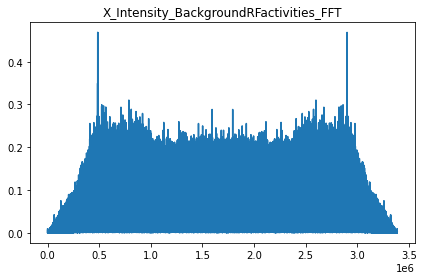

In [10]:
I_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(I_Data_First_BackgroundRFactivities_FFT[:]-np.mean(I_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

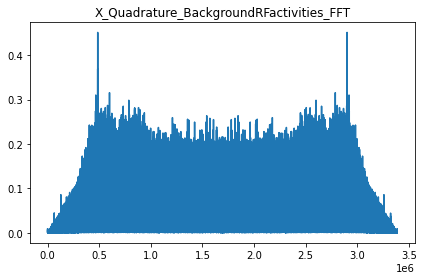

In [11]:
X_Quadrature_BackgroundRFactivities_FFT = abs(np.fft.fftshift(fft(Q_Data_First_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

In [12]:
I_Data_First_BackgroundRFactivities= I_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_BackgroundRFactivities= Q_Data_First_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_BackgroundRFactivities_2Dim = np.concatenate((I_Data_First_BackgroundRFactivities,Q_Data_First_BackgroundRFactivities),axis=1)


In [13]:
Concatenate_IQ_First_BackgroundRFactivities_2Dim.shape

(1000, 6774)

# Time Series BackGround RF Activities [ First Sticker ]

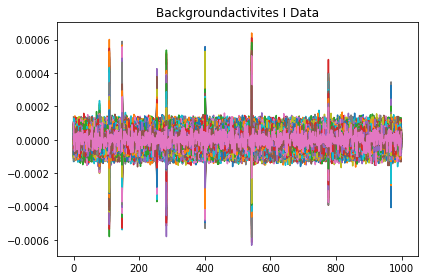

In [14]:
plt.plot(I_Data_First_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

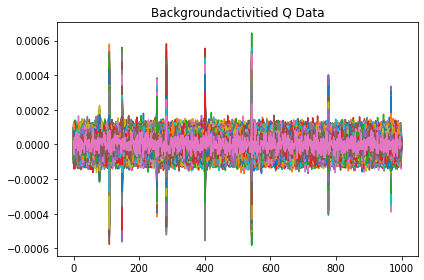

In [15]:
plt.plot(Q_Data_First_BackgroundRFactivities)
plt.title("Backgroundactivitied Q Data")
plt.tight_layout()
plt.show()


# FFT Connected [ First Sticker ]

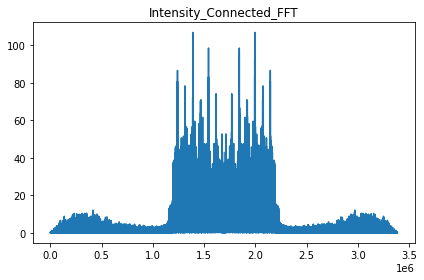

In [16]:
I_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = abs(np.fft.fftshift(fft(I_Data_First_Connected_FFT[:]-np.mean(I_Data_First_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

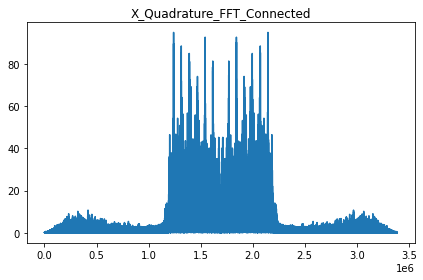

In [17]:
X_Quadrature_FFT_Connected = abs(np.fft.fftshift(fft(Q_Data_First_Connected_FFT[:]-np.mean(Q_Data_First_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# Time Series Connected [ First sticker ]

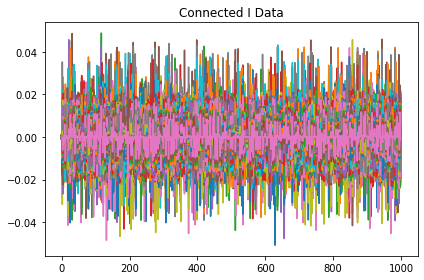

In [18]:
I_Data_First_Connected = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected = First_Sticker_Connected_numpy[0:,1]

I_Data_First_Connected= I_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Connected= Q_Data_First_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Connected_2Dim = np.concatenate((I_Data_First_Connected,Q_Data_First_Connected),axis=1)

plt.plot(I_Data_First_Connected[0:])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

In [19]:
Concatenate_IQ_First_Connected_2Dim.shape

(1000, 6774)

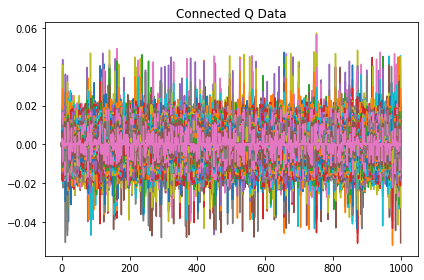

In [20]:
plt.plot(Q_Data_First_Connected[0:3877])
plt.title("Connected Q Data")
plt.tight_layout()
plt.show()

# FFT Searching [ First Sticker ]

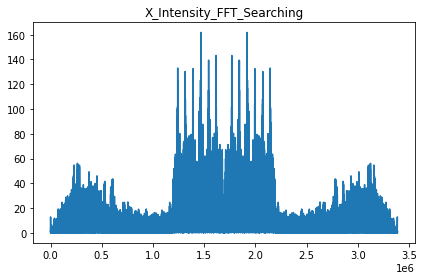

In [21]:
I_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = abs(np.fft.fftshift(fft(I_Data_First_Searching_FFT[:]-np.mean(I_Data_First_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

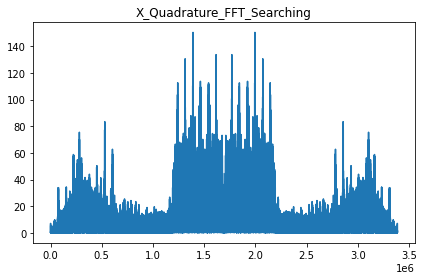

In [22]:
X_Quadrature_FFT_Searching = abs(np.fft.fftshift(fft(Q_Data_First_Searching_FFT[:]-np.mean(Q_Data_First_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching )
plt.title("X_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Time Series Searching [ First Sticker ]


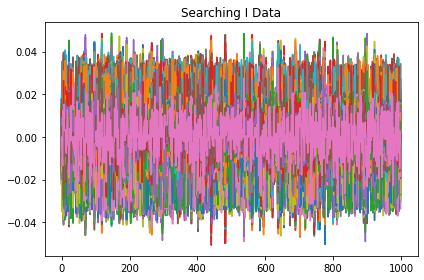

In [23]:
I_Data_First_Searching = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching = First_Sticker_Searching_numpy[0:,1]

I_Data_First_Searching= I_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching= Q_Data_First_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_2Dim = np.concatenate((I_Data_First_Searching,Q_Data_First_Searching),axis=1)


plt.plot(I_Data_First_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

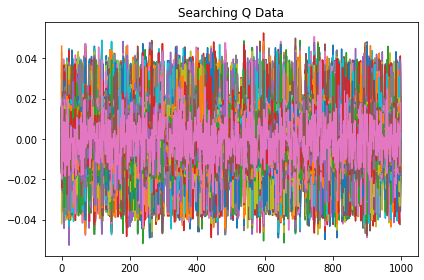

In [24]:
plt.plot(Q_Data_First_Searching[0:3877])
plt.title("Searching Q Data")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ First Sticker ] 

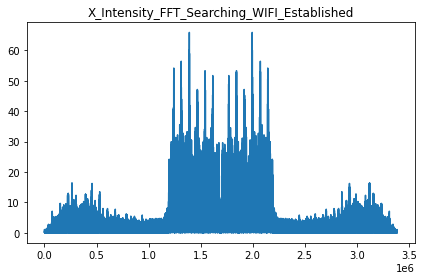

In [25]:
I_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(I_Data_First_Searching_WIFI_established_FFT[:]-np.mean(I_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

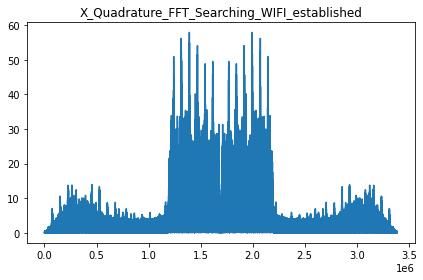

In [26]:
X_Quadrature_FFT_Searching_WIFI_established = abs(np.fft.fftshift(fft(Q_Data_First_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

# Time Series Searching WIFI Established [ First Sticker ]

In [27]:
I_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established = First_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_First_Searching_WIFI_established= I_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_First_Searching_WIFI_established= Q_Data_First_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_First_Searching_WIFI_established_2Dim = np.concatenate((I_Data_First_Searching_WIFI_established,Q_Data_First_Searching_WIFI_established),axis=1)


In [28]:
Concatenate_IQ_First_Searching_WIFI_established_2Dim.shape

(1000, 6774)

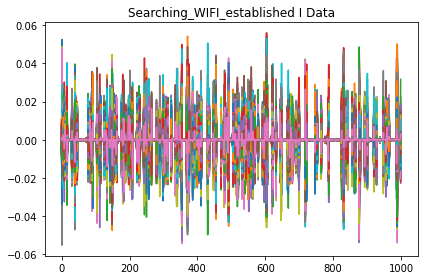

In [29]:
plt.plot(I_Data_First_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

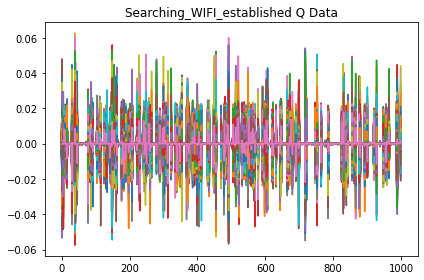

In [30]:
plt.plot(Q_Data_First_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established Q Data")
plt.tight_layout()
plt.show()

# Machine Learning ( Conv1D ) on First Sticker [ Time Series ] 

### Scaling using standardScaler

In [31]:
from sklearn.preprocessing import RobustScaler,StandardScaler

scaler_backgroundRFactivites = StandardScaler()
scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(Concatenate_IQ_First_BackgroundRFactivities_2Dim)
IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_BackgroundRFactivities_2Dim)

scaler_connected = StandardScaler()
scaler_connected_scaled = scaler_connected.fit(Concatenate_IQ_First_Connected_2Dim)
IQ_connected_numpy_scaled= scaler_connected_scaled.transform(Concatenate_IQ_First_Connected_2Dim)


scaler_searching = StandardScaler()
scaler_searching_scaled = scaler_searching.fit(Concatenate_IQ_First_Searching_2Dim)
IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(Concatenate_IQ_First_Searching_2Dim)

scaler_searching_WIFI_established = StandardScaler()
scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(Concatenate_IQ_First_Searching_WIFI_established_2Dim)
IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(Concatenate_IQ_First_Searching_WIFI_established_2Dim)

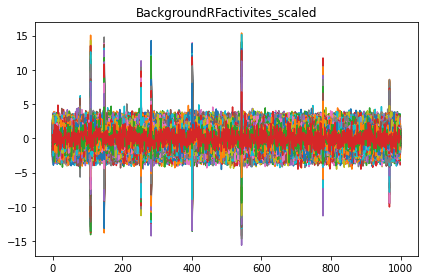

In [32]:
plt.plot(IQ_BackgroundRFactivites_numpy_scaled)
plt.title("BackgroundRFactivites_scaled")
plt.tight_layout()
plt.show()

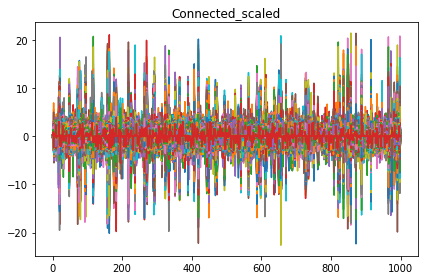

In [33]:
plt.plot(IQ_connected_numpy_scaled)
plt.title("Connected_scaled")
plt.tight_layout()
plt.show()

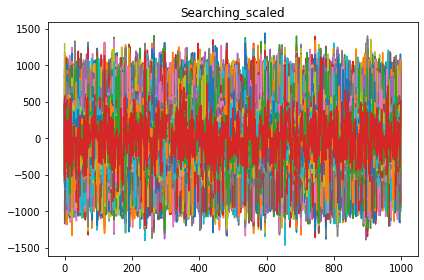

In [34]:
plt.plot(IQ_searching_numpy_scaled)
plt.title("Searching_scaled")
plt.tight_layout()
plt.show()

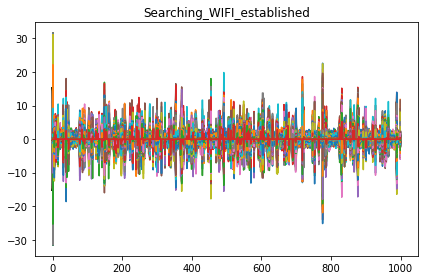

In [35]:
plt.plot(IQ_searching_WIFI_established_numpy_scaled)
plt.title("Searching_WIFI_established")
plt.tight_layout()
plt.show()


### Labelling 


In [36]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [37]:
np.random.seed(2016)

IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[ 0.59893691 -1.06475573 -0.40794592 ...  0.          0.
   0.        ]
 [ 0.89886298  1.34042539  0.34610655 ...  0.          0.
   0.        ]
 [-0.13460742  0.60914002 -1.46416284 ...  0.          0.
   0.        ]
 [-0.45460088  0.09103575  0.84446051 ...  0.          0.
   0.        ]
 [ 1.3457691  -0.26267516 -0.75684803 ...  0.          0.
   0.        ]]


[[0.05599012 0.08026211 0.06901589 ... 1.         0.         0.        ]
 [0.05710296 0.0850682  0.10446759 ... 1.         0.         0.        ]
 [0.07473122 0.09638179 0.06747081 ... 1.         0.         0.        ]
 [0.07727248 0.08003408 0.10186407 ... 1.         0.         0.        ]
 [0.06700224 0.09766225 0.11909112 ... 1.         0.         0.        ]]


[[-0.65256293 -0.65668895  1.05641039 ...  0.          1.
   0.        ]
 [-0.83235587  0.01467237 -2.5720

In [38]:
import copy

stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

In [39]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932
print(length_of_X_validation)

3600


In [40]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]
print(Y_Train_Dataset)

(2800, 6774)
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [44]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print(Validation_Dataset.shape)

(800, 6774)


In [45]:
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print(Validation_Dataset.shape)

(800, 6774, 1)


In [46]:
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 100
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(6774,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6765, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6756, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2252, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2243, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2234, 160)         256160    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

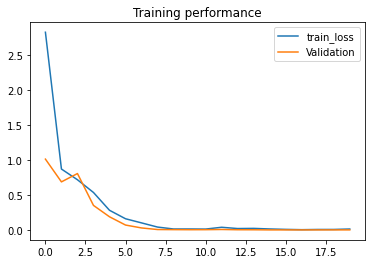

In [48]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()


In [49]:
model_m.save("{MODEL} First_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MODEL} First_Sticker_TRAINED/assets


In [50]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL} First_Sticker_TRAINED")
np.argmax(load_first_sticker_model.predict(Validation_Dataset[0:5]),axis=1)

array([2, 2, 0, 0, 2])

In [51]:
Y_Validation_Dataset[0:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

# Model Trained from First Sticker

In [52]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 29ms/step - loss: 0.0010 - accuracy: 1.0000
Accuracy: 100.00


# Model Trained from Third Sticker

In [53]:
from tensorflow import keras
load_Third_sticker_model = keras.models.load_model("{MODEL} Third_Sticker_TRAINED")
_,accuracy=load_Third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 1.3102 - accuracy: 0.7487
Accuracy: 74.87


# Model Trained from Fourth Sticker

In [54]:
from tensorflow import keras
load_Fourth_sticker_model = keras.models.load_model("{MODEL} Fourth_Sticker_TRAINED")
_,accuracy=load_Fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 1.3862 - accuracy: 0.7088
Accuracy: 70.88


# Model Trained from Fifth Sticker

In [55]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("{MODEL} Fifth_Sticker_TRAINED")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 1.4364 - accuracy: 0.7475
Accuracy: 74.75
